# Accessing, visualizing and editing feature data

 - from feature service with multiple layers
 - from feature collection items
 - from a map service with feature access enabled

In [4]:
from arcgis.gis import *
from getpass import getpass

In [5]:
password=getpass()
gis = GIS("https://python.playground.esri.com/portal", "atma.mani", password)

········


Search for a feature service titled 'fortune_500_styled_wfl'

In [6]:
search_result = gis.content.search('title:fortune_500_styled_wfl', item_type = 'Feature Layer')
search_result

[<Item title:"fortune_500_styled_wfl" type:Feature Layer Collection owner:atma.mani>]

<Item title:"fortune_500_styled_wfl" type:Feature Layer Collection owner:atma.mani>
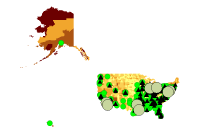

In [7]:
fortune_fl_item = search_result[0]
fortune_fl_item

In [8]:
fortune_fl_item.url

'http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled/FeatureServer'

Notice that this item represents a **Feature Layer Collection**

### Accessing a Feature Layer Collection
A Feature Layer Collection is simply a collection of Feature Layer objects

In [9]:
from arcgis.features import FeatureLayerCollection

Notice the url ends with a `FeatureServer`. We can use this URL to instantiate a `FeatureLayerCollection` object.

In [10]:
flc = FeatureLayerCollection(fortune_fl_item.url, gis)
type(flc)

arcgis.features.layer.FeatureLayerCollection

In [11]:
flc.layers

[<FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled/FeatureServer/0">,
 <FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled/FeatureServer/1">,
 <FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled/FeatureServer/2">,
 <FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled/FeatureServer/3">]

In [12]:
flc_ly1 = flc.layers[0]
type(flc_ly1)

arcgis.features.layer.FeatureLayer

Thus `FeatureLayerCollection.layers` = `[FeatureLayer]` objects

## Accessing a Feature Layer

In [13]:
fl_list = fortune_fl_item.layers
type(fl_list[0])

arcgis.features.layer.FeatureLayer

Thus FeatureLayer objects can be directly obtained from Item objects as well

In [14]:
fl_list

[<FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled/FeatureServer/0">,
 <FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled/FeatureServer/1">,
 <FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled/FeatureServer/2">,
 <FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled/FeatureServer/3">]

In [15]:
for layer in fl_list:
    print(layer.properties.name)

cities_over1mil
Fortune_500_Corporate_HQ
cities_over100k
Counties


In [16]:
cities_million_pop = fl_list[0]

In [17]:
cities_million_pop.properties.extent

{
  "xmax": -8238277.756585078,
  "ymin": 3473191.15015807,
  "xmin": -13162974.851296363,
  "ymax": 5210795.566323765,
  "spatialReference": {
    "latestWkid": 3857,
    "wkid": 102100
  }
}

In [18]:
map1 = gis.map('USA')
map1

In [19]:
map1.add_layer(cities_million_pop)

You can visualize `FeatureLayer` objects on the map widget

## Accessing FeatureSet objects
Let us query the FeatureLayer objected created above to get a `FeatureSet` in return

Let us write an empty query so we can get all the features

In [37]:
cities_mil_fset = cities_million_pop.query()
type(cities_mil_fset)

arcgis.features.feature.FeatureSet

In [21]:
cities_mil_fset.geometry_type

'esriGeometryPoint'

In [22]:
cities_mil_fset.spatial_reference

{'latestWkid': 3857, 'wkid': 102100}

In [38]:
cities_mil_fset.df

,feature,name,objectid,pop,SHAPE
0,"Population greater than 999,999 County Seat",Los Angeles,1,3485398.0,"{'y': 4035820.211774349, 'x': -13162974.851296..."
1,"Population greater than 999,999 County Seat",San Diego,2,1110549.0,"{'y': 3857562.1830241606, 'x': -13041954.62036..."
2,"Population greater than 999,999 County Seat",New York City,3,7322564.0,"{'y': 4970310.197143376, 'x': -8238277.756585078}"
3,"Population greater than 999,999 County Seat",Philadelphia,4,1585577.0,"{'y': 4859017.708513573, 'x': -8367174.402575912}"
4,"Population greater than 999,999 County Seat",Dallas,5,1006877.0,"{'y': 3866612.2823705524, 'x': -10775794.13167..."
5,"Population greater than 999,999 County Seat",Houston,6,1630553.0,"{'y': 3473191.15015807, 'x': -10615848.742394906}"
6,"Population greater than 999,999 County Seat",Chicago,7,2783726.0,"{'y': 5138534.111508258, 'x': -9757182.20522622}"
7,"Population greater than 999,999 County Seat",Detroit,8,1027974.0,"{'y': 5210795.566323765, 'x': -9244611.481048988}"


In [24]:
type(cities_mil_fset.df)

arcgis.features._data.geodataset.geodataframe.SpatialDataFrame

## Accessing Feature objects
Now get the `Features` from cities over 1 million population `FeatureSet`

In [25]:
cities_mil_features = cities_mil_fset.features
type(cities_mil_features)

list

In [26]:
len(cities_mil_features)

8

In [27]:
type(cities_mil_features[0])

arcgis.features.feature.Feature

In [28]:
f1= cities_mil_features[0]

In [29]:
f1.fields

['objectid', 'name', 'pop', 'feature']

# Editing features

In [30]:
cities_million_pop.properties.capabilities

'Query'

### Editing the FeatureLayerCollection definition

In [31]:
flc.manager.update_definition({'capabilities':'Create,Delete,Query,Update,Editing,Extract'})

{'success': True}

In [32]:
flc.properties.capabilities

'Create,Delete,Query,Update,Editing,Extract'

### Edit NYC name

In [33]:
# select 'NAME=New York'
ny_feature = [f for f in cities_mil_features if f.attributes['name']=='New York'][0]
ny_feature.attributes

{'feature': 'Population greater than 999,999   County Seat',
 'name': 'New York',
 'objectid': 3,
 'pop': 7322564.0}

In [34]:
import copy
ny_edit = copy.deepcopy(ny_feature)
ny_edit.attributes['name'] = 'New York City'

In [35]:
ny_edit

{"geometry": {"y": 4970310.197143376, "x": -8238277.756585078}, "attributes": {"objectid": 3, "name": "New York City", "feature": "Population greater than 999,999   County Seat", "pop": 7322564.0}}

In [36]:
update_result = cities_million_pop.edit_features(updates=[ny_edit])
update_result

{'addResults': [],
 'attachments': {'addResults': [], 'deleteResults': [], 'updateResults': []},
 'deleteResults': [],
 'updateResults': [{'globalId': None, 'objectId': 3, 'success': True}]}

### For more on editing
Visit the demo theater on 'ArcGIS Python API for Administrators and Content Publishers' at **Demo Theater 8** from **12:20 - 1:15pm**

**Features:**
 - Adding new attribute columns / fields
 - Editing, updating, deleting features (keeping local and online data in sync)
 - Overwriting feature layers
 
**Admin:**
 - Automating org management